In [503]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [424]:
def calculate_wacc(tax_rate = 0.35, unlevered_beta = 0.69, 
              risk_free_rate = 0.0304, market_return = 0.115, 
              interest_rate = 0.09, weight_debt = 0.2757, 
              liquidity_premium = 0.05, unsys_risk_adj = (1/0.3053-1)):

    weight_equity = 1 - weight_debt
    mrp = market_return - risk_free_rate
    levered_beta = unlevered_beta * (1 + (1 - tax_rate) * weight_debt)

    cost_of_equity = risk_free_rate + unlevered_beta * mrp
    financial_risk_premium = (levered_beta - unlevered_beta) * mrp
    levered_cost_of_equity = cost_of_equity + financial_risk_premium
    levered_cost_of_equity_liq = levered_cost_of_equity + liquidity_premium
    
    unsys_risk_premium = unsys_risk_adj * levered_beta * mrp

    tcoe = levered_cost_of_equity_liq + unsys_risk_premium
    wacc = tcoe * weight_equity + interest_rate * weight_debt * (1 - tax_rate)

    # print(f"Cost of Equity: {cost_of_equity}")
    # print(f"Financial Risk Premium: {financial_risk_premium}")
    # print(f"Levered Cost of Equity: {levered_cost_of_equity}")
    # print(f"Levered Cost of Equity with Liquidity Premium: {levered_cost_of_equity_liq}")
    # print(f"Unsystematic Risk Premium: {unsys_risk_premium}")
    # print(f"Total Cost of Equity: {tcoe}")
    # print(f"Weighted Average Cost of Capital: {wacc}")

    return wacc

In [553]:

# corr_with_market = 0.3053
# debt_to_equity = 0.2757
# weight_debt = 0.2757
# weight_equity = 1 - weight_debt


def calculate_npv(tax_rate = 0.35, investments = 18100, facility_costs = 16800,
                  labor_costs = 110240, revenues = 386100, inflation_rate = 0.04,
                  starting_cash = 27651.75,unlevered_beta = 0.69, risk_free_rate = 0.0304,
                  market_return = 0.115, liquidity_premium = 0.05, interest_rate = 0.09, 
                  cost_factor = 0.63, revenue_growth = 0.04):
    

    equity = starting_cash
    cum_wacc = 1
    npv = -1*starting_cash

    macrs = [0.2, 0.32, 0.192, 0.1152, 0.1152, 0.0576, 0, 0, 0, 0, 0]
    outstanding_principle = [10525.45, 8780.02, 6870.85, 4782.58, 2498.43, 0, 0, 0, 0, 0, 0]
    interest_payment = [876.46, 712.72, 533.63, 337.74, 123.47, 0, 0, 0, 0, 0, 0]
    principal_payment = [1745.44, 1909.17, 2088.26, 2284.16, 2498.43, 0, 0, 0, 0, 0, 0]

    for i in range(10):
        operating_costs = revenues * cost_factor
        depreciation = macrs[i] * investments
        loan_repayment = principal_payment[i] + interest_payment[i]
        ebit = revenues - operating_costs - labor_costs - facility_costs - depreciation
        ebt = ebit - loan_repayment
        net_income = ebt * (1-tax_rate)

        # Update the cash flow
        ending_cash = starting_cash
        ending_cash += net_income
        ending_cash += depreciation
        ending_cash -= investments if i == 0 else 0
        ending_cash += 10525.45 if i == 0 else 0 # Cash in from Financing

        # print(f'Net Income for year {i}: {round(net_income, 2)}')
        # print(f'Starting Cash for year {i}: {round(starting_cash, 2)}')
        # print(f'Ending Cash for year {i}: {round(ending_cash, 2)}')

        # Update the costs and revenues for next year
        facility_costs *= (1 + inflation_rate) 
        labor_costs *= (1 + inflation_rate)
        revenues *= (1 + revenue_growth)
        
        # Calculate Payout
        cash_buffer = 0.05*(1+revenue_growth)*revenues
        payout = ending_cash - cash_buffer
        starting_cash = ending_cash - payout

        equity = equity + net_income - payout
        w_equity = equity / (equity + outstanding_principle[i+1])
        w_debt = 1 - w_equity

        # print(f'Revenues for year {i+1}: {round(revenues, 2)}')
        # print(f'Starting Cash for year {i+1}: {round(starting_cash, 2)}')
        # print(f'Payout for year {i}: {round(payout, 2)}')
        # print(f'Equity for year {i}: {round(equity, 2)}')
        # print(f'Debt for year {i}: {round(outstanding_principle[i], 2)}')
        # print(f'Weight of Debt for year {i}: {round(w_debt, 4)}')

        # Calculate WACC
        wacc = calculate_wacc(tax_rate = tax_rate, unlevered_beta = unlevered_beta, 
              risk_free_rate = risk_free_rate, market_return = market_return, 
              interest_rate = interest_rate, weight_debt = w_debt, 
              liquidity_premium = liquidity_premium, unsys_risk_adj = (1/0.3053-1))
        
        cum_wacc /= (1+wacc)
        npv += payout*cum_wacc

        # print(f'WACC for year {i}: {round(wacc, 4)}')
        # print(f'Cumulative WACC for year {i}: {round(cum_wacc, 4)}')
        # print(f'NPV for year {i}: {round(npv, 2)}')

        if i == 9:
            tv = payout * (1 + revenue_growth) / (wacc - revenue_growth) * (1-tax_rate)
            tv *= cum_wacc
            # print(f'NPV without Terminal Value: {round(npv, 2)}')
            # print(f'NPV Terminal Value: {round(tv, 2)}')
            # print(f'NPV with Terminal Value: {round(npv+tv, 2)}')
            
            return (np.round(npv, 2), np.round(tv, 2), np.round(npv+tv, 2))


In [426]:
# calculate_npv(market_return=0.1730625)

12920


C:\Users\koppi\AppData\Local\Temp\ipykernel_24108\2055919230.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{int(x*100)}%' for x in plt.gca().get_xticks()])


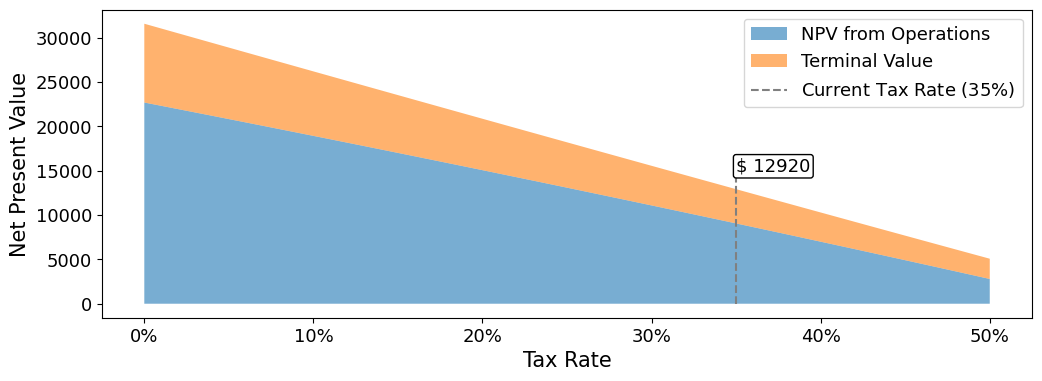

In [554]:
calculate_npvs = np.vectorize(calculate_npv)
tax_rates = np.linspace(0, 0.5, 100)
npvs = calculate_npvs(tax_rate=tax_rates)

# Calculate the stacked values
operations_npv = npvs[0]
terminal_value = npvs[1]

# Find the index corresponding to x=0.35
index_035 = 0.35
total_npv_035 = int(calculate_npv(tax_rate=0.35)[2])
print(total_npv_035)

index_break_even = 0.1730625

plt.figure(figsize=(12, 4)) 

# Plot the stacked areas
plt.fill_between(tax_rates, 0, operations_npv, label='NPV from Operations', alpha=0.6)
plt.fill_between(tax_rates, operations_npv, operations_npv + terminal_value, label='Terminal Value', alpha=0.6)

# Add a vertical line at x=0.35
plt.vlines(x=0.35, ymin=0, ymax=total_npv_035*1.2, color='grey', linestyle='--', label='Current Tax Rate ($35\%$)')

# Add NPV at current tax rate value label.
plt.text(
    0.35,
    total_npv_035 * 1.2,
    r"$ " + str(total_npv_035),
    fontsize=13,
    va="center",
    bbox=dict(
        facecolor="white",
        edgecolor="black",
        boxstyle="round",
        pad=0.15
    ),
    zorder=10 # to make sure the text is on top
)

# Adding labels and title
plt.xlabel('Tax Rate', fontsize=15)
plt.ylabel('Net Present Value', fontsize=15)
# plt.title('NPV vs Tax Rates')
plt.legend(fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)


# Format x-ticks as percentage
plt.gca().set_xticklabels([f'{int(x*100)}%' for x in plt.gca().get_xticks()])

plt.savefig("NPV_Tax_Rate.pdf", format="pdf", bbox_inches="tight")


# Show plot
plt.show()


In [456]:
calculate_npv(market_return=0.1698)

(np.float64(-1026.41), np.float64(1026.19), np.float64(-0.23))

12920


C:\Users\koppi\AppData\Local\Temp\ipykernel_24108\3768343882.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{x:.0%}' for x in plt.gca().get_xticks()])


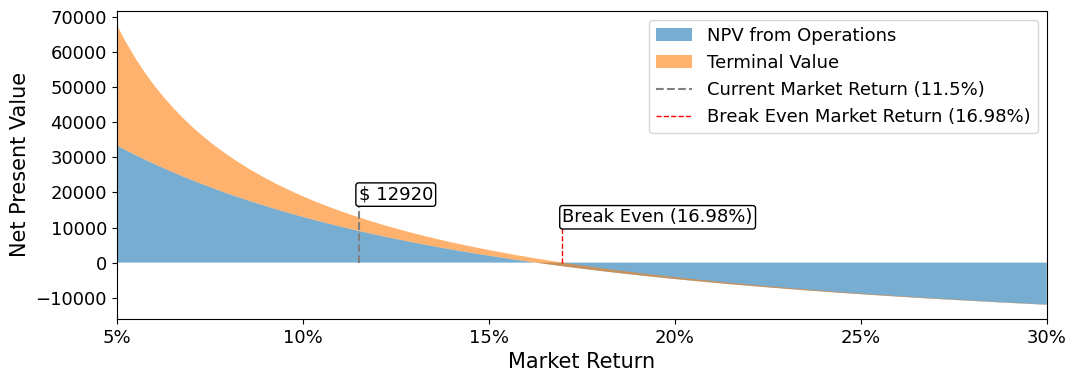

In [555]:
calculate_npvs = np.vectorize(calculate_npv)
market_returns = np.linspace(0.05, 0.3, 100)
npvs = calculate_npvs(market_return=market_returns)

# Calculate the stacked values
operations_npv = npvs[0]
terminal_value = npvs[1]

# Specific market return value at 0.115
total_npv_035 = int(calculate_npv(market_return=0.115)[2])
print(total_npv_035)

# Plot the stacked areas using market_returns instead of tax_rates
plt.figure(figsize=(12, 4)) 
plt.fill_between(market_returns, 0, operations_npv, label='NPV from Operations', alpha=0.6)
plt.fill_between(market_returns, operations_npv, operations_npv + terminal_value, label='Terminal Value', alpha=0.6)

# Add a vertical line at market_return=0.115
plt.vlines(x=0.115, ymin=0, ymax=total_npv_035 * 1.5, color='grey', linestyle='--', label='Current Market Return (11.5%)')
plt.vlines(x=0.1698, ymin=0, ymax=total_npv_035, color='red', linestyle='--', label='Break Even Market Return (16.98%)', linewidth=1)


# Add NPV at current market return value label
plt.text(
    0.115,
    total_npv_035 * 1.5,
    r"$ " + str(total_npv_035),
    fontsize=13,
    va="center",
    bbox=dict(
        facecolor="white",
        edgecolor="black",
        boxstyle="round",
        pad=0.15
    ),
    zorder=10  # to make sure the text is on top
)

plt.text(
    0.1698,
    total_npv_035,
    "Break Even (16.98%)",
    fontsize=13,
    va="center",
    bbox=dict(
        facecolor="white",
        edgecolor="black",
        boxstyle="round",
        pad=0.15
    ),
    zorder=10 # to make sure the text is on top
)

# Adding labels and title
plt.xlabel('Market Return', fontsize=15)
plt.ylabel('Net Present Value', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)

# Format x-ticks as percentage
plt.legend(fontsize=13)

# Set the x-axis limits to match the market_returns range
plt.xlim(0.05, 0.3)
plt.gca().set_xticklabels([f'{x:.0%}' for x in plt.gca().get_xticks()]) 
plt.savefig("NPV_Market_Return.pdf", format="pdf", bbox_inches="tight")

# Show plot
plt.show()

12920


C:\Users\koppi\AppData\Local\Temp\ipykernel_24108\799545243.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{x:.0%}' for x in plt.gca().get_xticks()])


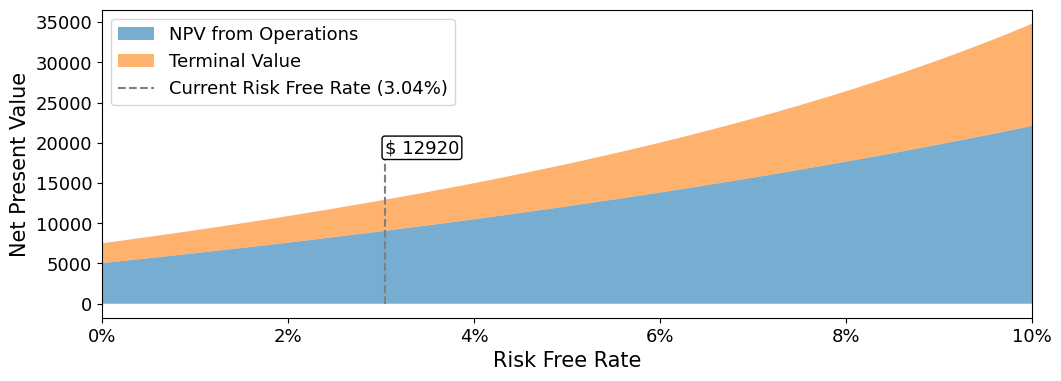

In [510]:
calculate_npvs = np.vectorize(calculate_npv)
risk_free_rates = np.linspace(0, 0.1, 100)
npvs = calculate_npvs(risk_free_rate=risk_free_rates)

# Calculate the stacked values
operations_npv = npvs[0]
terminal_value = npvs[1]

# Specific risk free rate value at 0.0304
total_npv_035 = int(calculate_npv(risk_free_rate=0.0304)[2])
print(total_npv_035)

# Plot the stacked areas using risk_free_rates
plt.figure(figsize=(12, 4)) 
plt.fill_between(risk_free_rates, 0, operations_npv, label='NPV from Operations', alpha=0.6)
plt.fill_between(risk_free_rates, operations_npv, operations_npv + terminal_value, label='Terminal Value', alpha=0.6)

# Add a vertical line at risk_free_rate=0.0304
plt.vlines(x=0.0304, ymin=0, ymax=total_npv_035 * 1.5, color='grey', linestyle='--', label='Current Risk Free Rate (3.04%)')

# Add NPV at current risk free rate value label
plt.text(
    0.0304,
    total_npv_035 * 1.5,
    r"$ " + str(total_npv_035),
    fontsize=13,
    va="center",
    bbox=dict(
        facecolor="white",
        edgecolor="black",
        boxstyle="round",
        pad=0.15
    ),
    zorder=10  # to make sure the text is on top
)

# Adding labels and title
plt.xlabel('Risk Free Rate', fontsize=15)
plt.ylabel('Net Present Value', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)

# Format x-ticks as percentage
plt.legend(fontsize=13)

# Set the x-axis limits to match the risk_free_rates range
plt.xlim(0, 0.1)
plt.gca().set_xticklabels([f'{x:.0%}' for x in plt.gca().get_xticks()]) 

plt.savefig("NPV_Risk_Free_Rate.pdf", format="pdf", bbox_inches="tight")


# Show plot
plt.show()


In [469]:
calculate_npv(revenue_growth=0.029742)

(np.float64(-700.91), np.float64(700.85), np.float64(-0.06))

12920


C:\Users\koppi\AppData\Local\Temp\ipykernel_24108\2442165560.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{x:.0%}' for x in plt.gca().get_xticks()])


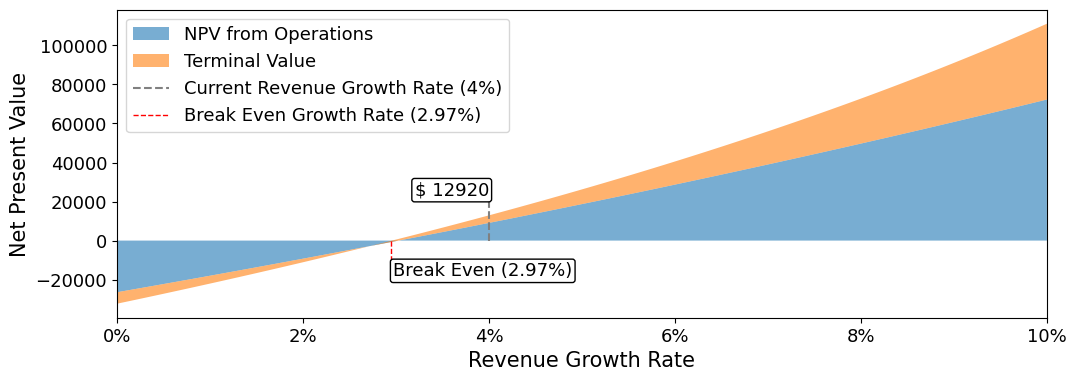

In [556]:
calculate_npvs = np.vectorize(calculate_npv)
min_lim = 0
max_lim = 0.1
revenue_growths = np.linspace(min_lim, max_lim, 100)
npvs = calculate_npvs(revenue_growth=revenue_growths)

# Calculate the stacked values
operations_npv = npvs[0]
terminal_value = npvs[1]

# Specific risk free rate value at 0.04
total_npv_035 = int(calculate_npv(revenue_growth=0.04)[2])
print(total_npv_035)

# Plot the stacked areas using revenue_growths
plt.figure(figsize=(12, 4))  
plt.fill_between(revenue_growths, 0, operations_npv, label='NPV from Operations', alpha=0.6)
plt.fill_between(revenue_growths, operations_npv, operations_npv + terminal_value, label='Terminal Value', alpha=0.6)

# Add a vertical line at risk_free_rate=0.0304
plt.vlines(x=0.04, ymin=0, ymax=total_npv_035 * 2, color='grey', linestyle='--', label='Current Revenue Growth Rate (4%)')
plt.vlines(x=0.029425, ymin=0, ymax=-1.2*total_npv_035, color='red', linestyle='--', label='Break Even Growth Rate (2.97%)', linewidth=1)



# Add NPV at current risk free rate value label
plt.text(
    0.04,
    total_npv_035 * 2,
    r"$ " + str(total_npv_035),
    fontsize=13,
    va="center",
    ha="right",
    bbox=dict(
        facecolor="white",
        edgecolor="black",
        boxstyle="round",
        pad=0.15
    ),
    zorder=10  # to make sure the text is on top
)

plt.text(
    0.0297,
    -1.2*total_npv_035,
    "Break Even (2.97%)",
    fontsize=13,
    va="center",
    bbox=dict(
        facecolor="white",
        edgecolor="black",
        boxstyle="round",
        pad=0.15
    ),
    zorder=10 # to make sure the text is on top
)

# Adding labels and title
plt.xlabel('Revenue Growth Rate', fontsize=15)
plt.ylabel('Net Present Value', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)

# Format x-ticks as percentage
plt.legend(fontsize=13)

# Set the x-axis limits to match the revenue_growths range
plt.xlim(min_lim, max_lim)
plt.gca().set_xticklabels([f'{x:.0%}' for x in plt.gca().get_xticks()])

plt.savefig("NPV_Growth_Rate.pdf", format="pdf", bbox_inches="tight")


# Show plot
plt.show()


In [489]:
calculate_npv(cost_factor=0.64173)

(np.float64(-2662.97), np.float64(2663.13), np.float64(0.16))

12920


C:\Users\koppi\AppData\Local\Temp\ipykernel_24108\2279387973.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{x:.0%}' for x in plt.gca().get_xticks()])


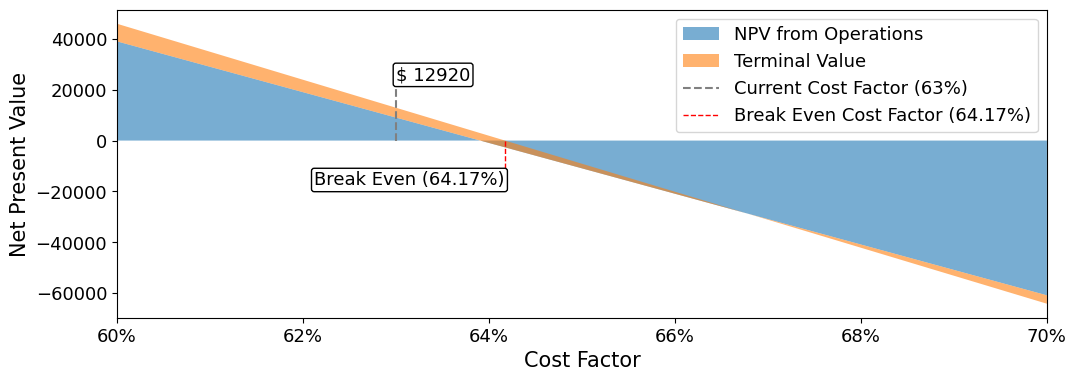

In [507]:
calculate_npvs = np.vectorize(calculate_npv)
min_lim = 0.6
max_lim = 0.7
cost_factors = np.linspace(min_lim, max_lim, 100)
npvs = calculate_npvs(cost_factor=cost_factors)

# Calculate the stacked values
operations_npv = npvs[0]
terminal_value = npvs[1]

# Specific cost factor value at 0.65
total_npv_035 = int(calculate_npv(cost_factor=0.63)[2])
print(total_npv_035)

# Plot the stacked areas using cost_factors
plt.figure(figsize=(12, 4)) 
plt.fill_between(cost_factors, 0, operations_npv, label='NPV from Operations', alpha=0.6)
plt.fill_between(cost_factors, operations_npv, operations_npv + terminal_value, label='Terminal Value', alpha=0.6)

# Add a vertical line at cost_factor=0.65
plt.vlines(x=0.63, ymin=0, ymax=total_npv_035 * 2, color='grey', linestyle='--', label='Current Cost Factor (63%)')
plt.vlines(x=0.6417, ymin=0, ymax=-1.2*total_npv_035, color='red', linestyle='--', label='Break Even Cost Factor (64.17%)', linewidth=1)

# Add NPV at current cost factor value label
plt.text(
    0.63,
    total_npv_035 * 2,
    r"$ " + str(total_npv_035),
    fontsize=13,
    va="center",
    ha="left",
    bbox=dict(
        facecolor="white",
        edgecolor="black",
        boxstyle="round",
        pad=0.15
    ),
    zorder=10  # to make sure the text is on top
)

plt.text(
    0.6417,
    -1.2*total_npv_035,
    "Break Even (64.17%)",
    fontsize=13,
    va="center",
    ha="right",
    bbox=dict(
        facecolor="white",
        edgecolor="black",
        boxstyle="round",
        pad=0.15
    ),
    zorder=10 # to make sure the text is on top
)

# Adding labels and title
plt.xlabel('Cost Factor', fontsize=15)
plt.ylabel('Net Present Value', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)

# Set the x-axis limits to match the cost_factors range
plt.xlim(min_lim, max_lim)

# Format x-ticks as percentage
plt.gca().set_xticklabels([f'{x:.0%}' for x in plt.gca().get_xticks()]) 

plt.savefig("NPV_Cost_Factor.pdf", format="pdf", bbox_inches="tight")

# Show plot
plt.show()


12920.18


C:\Users\koppi\AppData\Local\Temp\ipykernel_24108\873050291.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{x:.0%}' for x in plt.gca().get_xticks()])


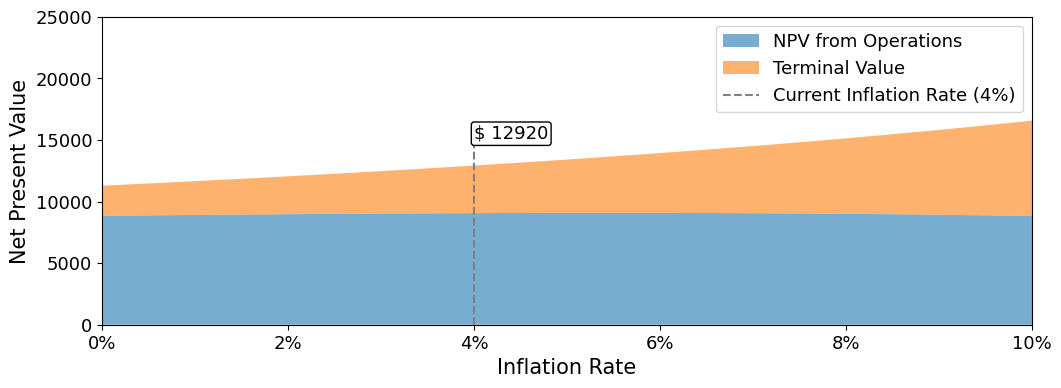

In [512]:
calculate_npvs = np.vectorize(calculate_npv)

min_lim = 0.0
max_lim = 0.1
inflation_rates = np.linspace(min_lim, max_lim, 100)
npvs = calculate_npvs(inflation_rate=inflation_rates, revenue_growth=inflation_rates)

# Calculate the stacked values
operations_npv = npvs[0]
terminal_value = npvs[1]

# Specific cost factor value at 0.65
total_npv_035 = calculate_npv()[2]
print(total_npv_035)

# Plot the stacked areas using cost_factors
plt.figure(figsize=(12, 4)) 
plt.fill_between(inflation_rates, 0, operations_npv, label='NPV from Operations', alpha=0.6)
plt.fill_between(inflation_rates, operations_npv, operations_npv + terminal_value, label='Terminal Value', alpha=0.6)

# Add a vertical line at cost_factor=0.65
plt.vlines(x=0.04, ymin=0, ymax=total_npv_035 * 1.2, color='grey', linestyle='--', label='Current Inflation Rate (4%)')

# Add NPV at current cost factor value label
plt.text(
    0.04,
    total_npv_035 * 1.2,
    r"$ " + str(int(total_npv_035)),
    fontsize=13,
    va="center",
    ha="left",
    bbox=dict(
        facecolor="white",
        edgecolor="black",
        boxstyle="round",
        pad=0.15
    ),
    zorder=10  # to make sure the text is on top
)

# Adding labels and title
plt.xlabel('Inflation Rate', fontsize=15)
plt.ylabel('Net Present Value', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)

# Format x-ticks as percentage
plt.legend(fontsize=13)

# Set the x-axis limits to match the cost_factors range
plt.xlim(min_lim, max_lim)
plt.ylim(0, 25000)

plt.gca().set_xticklabels([f'{x:.0%}' for x in plt.gca().get_xticks()]) 
plt.savefig("NPV_Inflation_Rate.pdf", format="pdf", bbox_inches="tight")

# Show plot
plt.show()


In [527]:
calculate_npv(revenues=386100*0.724892/0.75)

(np.float64(-2614.91), np.float64(2614.88), np.float64(-0.03))

12920.18


C:\Users\koppi\AppData\Local\Temp\ipykernel_24108\964431932.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{x:.0%}' for x in plt.gca().get_xticks()])


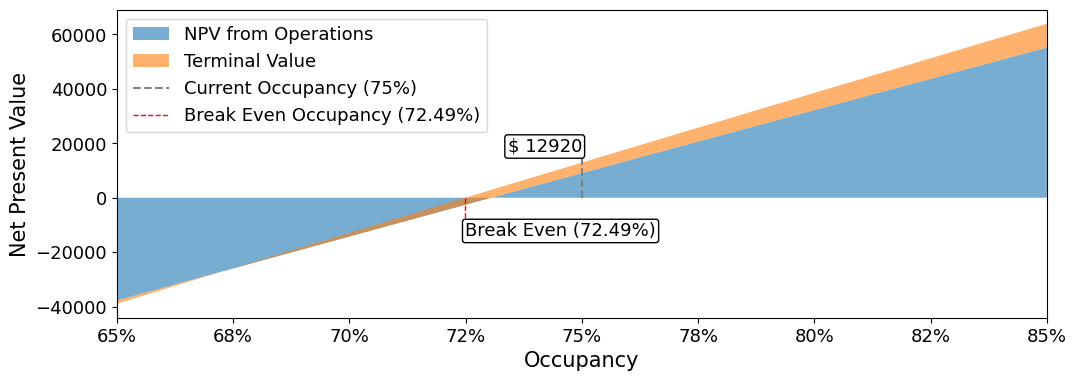

In [528]:
revenue_factor = np.random.normal(0.75, 0.02, 200000)/0.75

calculate_npvs = np.vectorize(calculate_npv)
min_lim = 0.65
max_lim = 0.85
revenue_factors = np.linspace(min_lim, max_lim, 100)
npvs = calculate_npvs(revenues=386100/0.75*revenue_factors)

# Calculate the stacked values
operations_npv = npvs[0]
terminal_value = npvs[1]

# Specific cost factor value at 0.65
total_npv_035 = calculate_npv()[2]
print(total_npv_035)

# Plot the stacked areas using cost_factors
plt.figure(figsize=(12, 4)) 
plt.fill_between(revenue_factors, 0, operations_npv, label='NPV from Operations', alpha=0.6)
plt.fill_between(revenue_factors, operations_npv, operations_npv + terminal_value, label='Terminal Value', alpha=0.6)

# Add a vertical line at cost_factor=0.65
plt.vlines(x=0.75, ymin=0, ymax=total_npv_035 * 1.2, color='grey', linestyle='--', label='Current Occupancy (75%)')
plt.vlines(x=0.7249, ymin=0, ymax=-1.2*total_npv_035, color='red', linestyle='--', label='Break Even Occupancy (72.49%)', linewidth=1)



# Add NPV at current cost factor value label
plt.text(
    0.75,
    total_npv_035 * 1.2,
    r"$ " + str(int(total_npv_035)),
    fontsize=13,
    va="bottom",
    ha="right",
    bbox=dict(
        facecolor="white",
        edgecolor="black",
        boxstyle="round",
        pad=0.15
    ),
    zorder=10  # to make sure the text is on top
)

# Add NPV at current cost factor value label
plt.text(
    0.7249,
    total_npv_035 * -1.2,
    "Break Even (72.49%)",
    fontsize=13,
    va="bottom",
    ha="left",
    bbox=dict(
        facecolor="white",
        edgecolor="black",
        boxstyle="round",
        pad=0.15
    ),
    zorder=10  # to make sure the text is on top
)

# Adding labels and title
plt.xlabel('Occupancy', fontsize=15)
plt.ylabel('Net Present Value', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)

# Format x-ticks as percentage
plt.legend(fontsize=13)

# Set the x-axis limits to match the cost_factors range
plt.xlim(min_lim, max_lim)

plt.gca().set_xticklabels([f'{x:.0%}' for x in plt.gca().get_xticks()]) 

plt.savefig("NPV_Revenue.pdf", format="pdf", bbox_inches="tight")

# Show plot
plt.show()


### Simulation einiger ausgewählter Szenarien
Kirk rechnet mit einer durchschnittlichen Auslastung von 75% in seinem Café und erwartet, dass der Umsatz entsprechend mit der Inflation wächst. Nehmen wir jedoch an, dass die Auslastung in seinem Café durchschnittlich nur 72% beträgt (Also statt durchschnittlich 30/40 Plätze nun 28.8/40 Plätzen belegt sind), dann sinkt sein NPV bereits auf einen negativen Wert.

In [537]:
print(calculate_npv(revenues=386100*0.9665229)) # Break Even-Point
print(calculate_npv(revenues=386100*0.9667)) # Auslastung 29/40 Plätzen statt 30/40

(np.float64(-2614.83), np.float64(2614.89), np.float64(0.06))
(np.float64(-2552.95), np.float64(2621.51), np.float64(68.56))


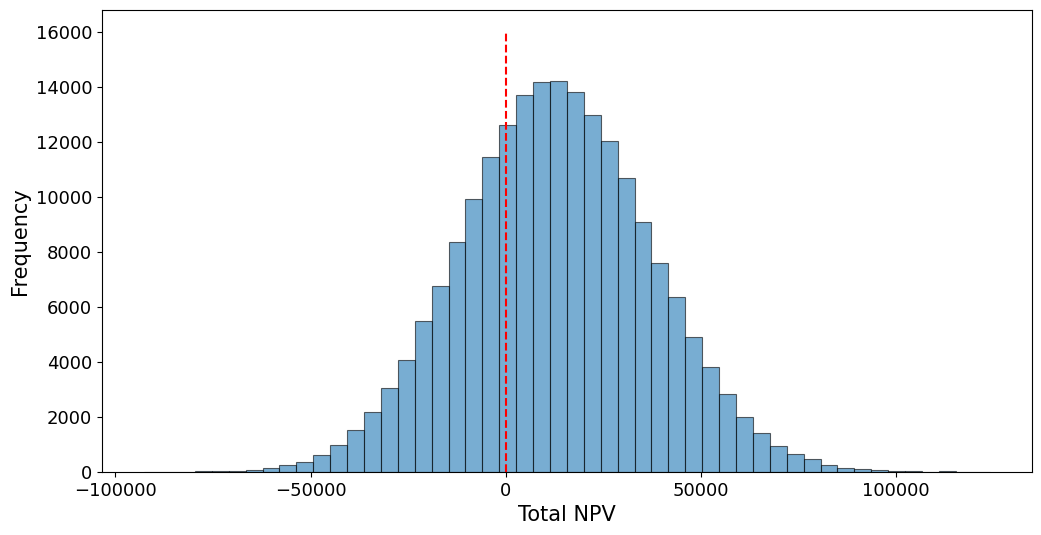

In [545]:
# Generate normally distributed random numbers
revenue_factor = np.random.normal(0.75, 0.02, 200000)/0.75
cost_factors = np.random.normal(0.63, 0.02, 200000)

calculate_npvs = np.vectorize(calculate_npv)
npvs = calculate_npvs(revenues=386100*revenue_factor, cost_factor = cost_factors)

# Plotting the histogram
plt.figure(figsize=(12, 6)) 
plt.hist(npvs[2], bins=50, edgecolor='black', alpha=0.6, linewidth=0.8)
plt.vlines(x=0, ymin=0, ymax=16000, color='red', linestyle='--', label='Break Even Point')
plt.xlabel('Total NPV', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.savefig("NPV_Simulations.pdf", format="pdf", bbox_inches="tight")

# Show plot
plt.show()

In [549]:
print(sum(npvs[2] < 0) / 200000)
print(sum((npvs[2] > 0) * (npvs[2] < 30000)) / 200000) # Kleiner Workaround
print(sum(npvs[2] > 30000) / 200000)


0.29915
0.461245
0.239605


In [550]:
# Generate normally distributed random numbers
revenue_factor = np.random.normal(0.75, 0.02, 200000)/0.75
cost_factors = np.random.normal(0.63, 0.02, 200000)
growth_factors = np.random.normal(0.04, 0.005, 200000)
market_returns = np.random.normal(0.115, 0.02, 200000)
risk_free_rates = np.random.normal(0.0304, 0.01, 200000)
inflation_rates = np.random.normal(0.04, 0.01, 200000)

calculate_npvs = np.vectorize(calculate_npv)
npvs2 = calculate_npvs(revenues=386100*revenue_factor, cost_factor = cost_factors, revenue_growth=growth_factors,
                      market_return=market_returns, risk_free_rate=risk_free_rates, inflation_rate=inflation_rates)

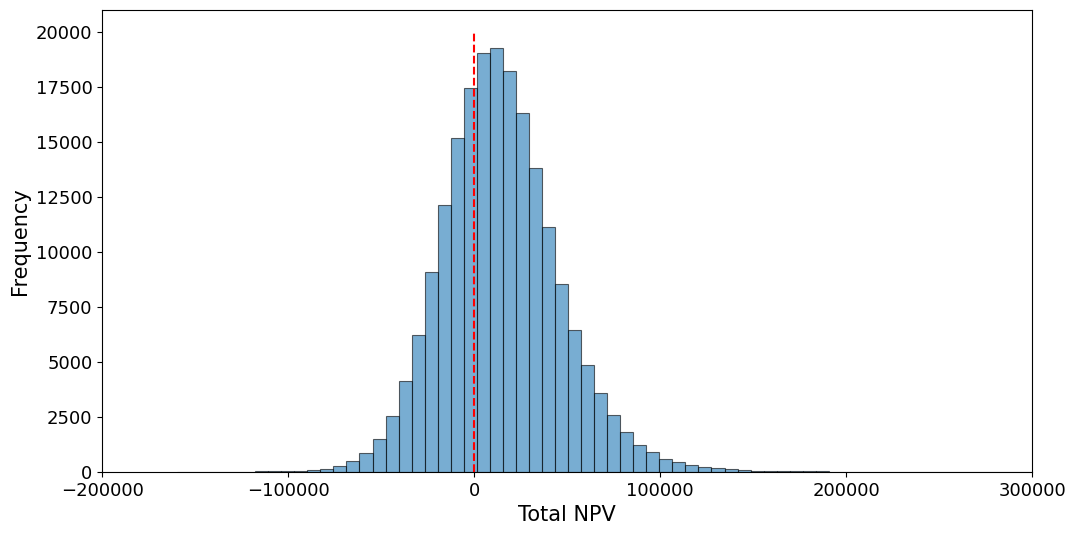

In [541]:
# Plotting the histogram
plt.figure(figsize=(12, 6)) 
plt.hist(npvs2[2], bins=100, edgecolor='black', alpha=0.6, linewidth=0.8)
plt.vlines(x=0, ymin=0, ymax=20000, color='red', linestyle='--', label='Break Even Point')
plt.xlim(-200000, 300000)
plt.xlabel('Total NPV', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.savefig("NPV_Simulations_2.pdf", format="pdf", bbox_inches="tight")

# Show plot
plt.show()

In [551]:
print(sum(npvs2[2] < 0) / 200000)
print(sum((npvs2[2] > 0) * (npvs2[2] < 30000)) / 200000) # Kleiner Workaround
print(sum(npvs2[2] > 30000) / 200000)

0.330485
0.38922
0.280295


In [543]:
calculate_npvs = np.vectorize(calculate_npv)
market_returns = np.linspace(0, 0.15, 1)
# print(market_returns)
temp = []
for i in np.linspace(0, 0.1, 101):
    temp.append(calculate_npv(risk_free_rate=i, market_return=market_returns)[2]>0)

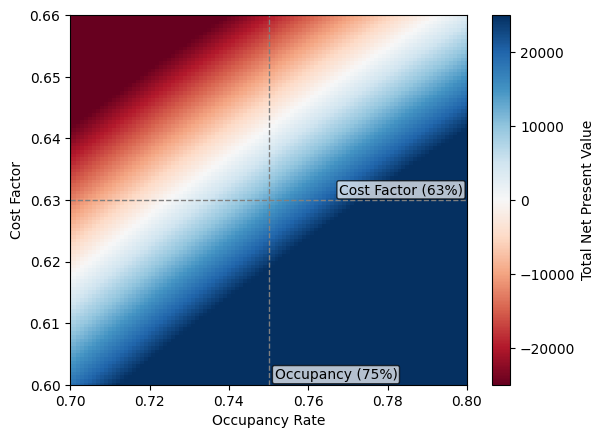

In [544]:
calculate_npvs = np.vectorize(calculate_npv)

cost_factors = np.linspace(0.60, 0.66, 101)
revenue_factors = np.linspace(0.7, 0.8, 101)/0.75


temp = []
for rf in revenue_factors:
    npv_values = calculate_npvs(revenues=386100 * rf, cost_factor=cost_factors)[2]
    temp.append(npv_values)

# Convert temp to a numpy array for proper indexing
temp = np.array(temp).T  # Transpose to match the shape expected by pcolormesh

# Create a meshgrid for plotting and scale the x-axis by 0.75
X, Y = np.meshgrid(revenue_factors * 0.75, cost_factors)  # Scale by 0.75

# Create the plot
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, temp, cmap='RdBu', vmin=-25000, vmax=25000, shading='auto')
ax.vlines(x=1 * 0.75, ymin=0.6, ymax=0.66, color='grey', linestyle='--', label='Current Revenue Factor', linewidth=1)
ax.hlines(y=0.63, xmin=0.7, xmax=0.8, color='grey', linestyle='--', label='Current Cost Factor', linewidth=1)
ax.set_xlabel('Occupancy Rate')
ax.set_ylabel('Cost Factor')

# Set the axis limits to the scaled ranges
ax.axis([X.min(), X.max(), Y.min(), Y.max()])

# Add a color bar
fig.colorbar(c, ax=ax, label='Total Net Present Value')

# Add NPV at current cost factor value label
plt.text(
    0.7515,
    0.6005,
    "Occupancy (75%)",
    fontsize=10,
    va="bottom",
    ha="left",
    bbox=dict(
        facecolor="white",
        alpha=0.7,
        edgecolor="black",
        boxstyle="round",
        pad=0.15
    ),
    zorder=10  # to make sure the text is on top
)

plt.text(
    0.799,
    0.6305,
    "Cost Factor (63%)",
    fontsize=10,
    va="bottom",
    ha="right",
    bbox=dict(
        facecolor="white",
        alpha=0.7,
        edgecolor="black",
        boxstyle="round",
        pad=0.15
    ),
    zorder=10  # to make sure the text is on top
)

plt.savefig("NPV_Heatmap.pdf", format="pdf", bbox_inches="tight")
# Display the plot
plt.show()

In [446]:
calculate_npv(revenues=386100*(0.74/0.75), cost_factor=0.64)

(np.float64(-5452.7), np.float64(2356.27), np.float64(-3096.43))

In [447]:
calculate_npv(revenues=386100*(0.72/0.75))

(np.float64(-4894.98), np.float64(2370.89), np.float64(-2524.09))

In [552]:
calculate_npv()

(np.float64(9057.23), np.float64(3862.95), np.float64(12920.18))

In [563]:

# corr_with_market = 0.3053
# debt_to_equity = 0.2757
# weight_debt = 0.2757
# weight_equity = 1 - weight_debt


def calculate_payback(tax_rate = 0.35, investments = 18100, facility_costs = 16800,
                  labor_costs = 110240, revenues = 386100, inflation_rate = 0.04,
                  starting_cash = 27651.75, cost_factor = 0.63, revenue_growth = 0.04):
    

    equity = starting_cash

    macrs = [0.2, 0.32, 0.192, 0.1152, 0.1152, 0.0576, 0, 0, 0, 0, 0]
    interest_payment = [876.46, 712.72, 533.63, 337.74, 123.47, 0, 0, 0, 0, 0, 0]
    principal_payment = [1745.44, 1909.17, 2088.26, 2284.16, 2498.43, 0, 0, 0, 0, 0, 0]

    total = -1*starting_cash

    for i in range(10):
        operating_costs = revenues * cost_factor
        depreciation = macrs[i] * investments
        loan_repayment = principal_payment[i] + interest_payment[i]
        ebit = revenues - operating_costs - labor_costs - facility_costs - depreciation
        ebt = ebit - loan_repayment
        net_income = ebt * (1-tax_rate)

        # Update the cash flow
        ending_cash = starting_cash
        ending_cash += net_income
        ending_cash += depreciation
        ending_cash -= investments if i == 0 else 0
        ending_cash += 10525.45 if i == 0 else 0 # Cash in from Financing

        # print(f'Net Income for year {i}: {round(net_income, 2)}')
        # print(f'Starting Cash for year {i}: {round(starting_cash, 2)}')
        # print(f'Ending Cash for year {i}: {round(ending_cash, 2)}')

        # Update the costs and revenues for next year
        facility_costs *= (1 + inflation_rate) 
        labor_costs *= (1 + inflation_rate)
        revenues *= (1 + revenue_growth)
        
        # Calculate Payout
        cash_buffer = 0.05*(1+revenue_growth)*revenues
        payout = ending_cash - cash_buffer
        starting_cash = ending_cash - payout

        total += payout
        if total > 0:
            return i+1
    return 11

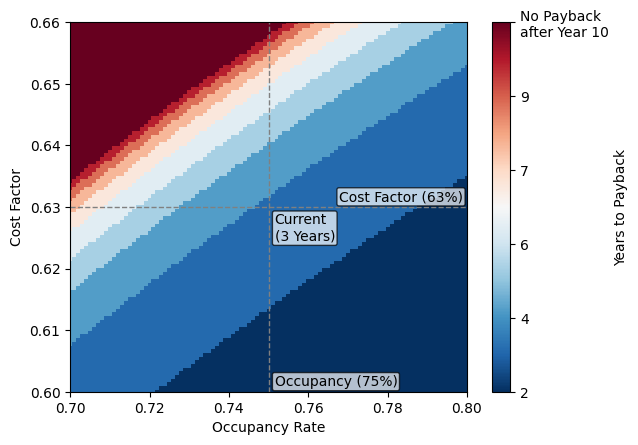

In [582]:
calculate_npvs = np.vectorize(calculate_payback)

cost_factors = np.linspace(0.60, 0.66, 101)
revenue_factors = np.linspace(0.7, 0.8, 101)/0.75


temp = []
for rf in revenue_factors:
    npv_values = calculate_npvs(revenues=386100 * rf, cost_factor=cost_factors)
    temp.append(npv_values)

# Convert temp to a numpy array for proper indexing
temp = np.array(temp).T  # Transpose to match the shape expected by pcolormesh

# Create a meshgrid for plotting and scale the x-axis by 0.75
X, Y = np.meshgrid(revenue_factors * 0.75, cost_factors)  # Scale by 0.75

# Create the plot
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, temp, cmap='RdBu_r', vmin=temp.min(), vmax=temp.max(), shading='auto')
ax.vlines(x=1 * 0.75, ymin=0.6, ymax=0.66, color='grey', linestyle='--', label='Current Revenue Factor', linewidth=1)
ax.hlines(y=0.63, xmin=0.7, xmax=0.8, color='grey', linestyle='--', label='Current Cost Factor', linewidth=1)
ax.set_xlabel('Occupancy Rate')
ax.set_ylabel('Cost Factor')

# Set the axis limits to the scaled ranges
ax.axis([X.min(), X.max(), Y.min(), Y.max()])

# Add a color bar
cbar = fig.colorbar(c, ax=ax)

# Set custom ticks for the color bar, replace the max value (11) with "No Payback"
ticks = np.linspace(temp.min(), temp.max(), num=6)  # Define 6 ticks
ticks[-1] = 11  # Replace the maximum tick value with 11
cbar.set_ticks(ticks)  # Set these ticks on the color bar

# Replace the tick labels, changing the last one to "No Payback"
tick_labels = [f"{tick:.0f}" for tick in ticks]  # Convert ticks to string labels
tick_labels[-1] = "No Payback\nafter Year 10"  # Replace the last label
cbar.set_ticklabels(tick_labels)  # Set these labels on the color bar
cbar.set_label('Years to Payback')

# Add NPV at current cost factor value label
plt.text(
    0.7515,
    0.6005,
    "Occupancy (75%)",
    fontsize=10,
    va="bottom",
    ha="left",
    bbox=dict(
        facecolor="white",
        alpha=0.7,
        edgecolor="black",
        boxstyle="round",
        pad=0.15
    ),
    zorder=10  # to make sure the text is on top
)

plt.text(
    0.799,
    0.6305,
    "Cost Factor (63%)",
    fontsize=10,
    va="bottom",
    ha="right",
    bbox=dict(
        facecolor="white",
        alpha=0.7,
        edgecolor="black",
        boxstyle="round",
        pad=0.15
    ),
    zorder=10  # to make sure the text is on top
)

plt.text(
    0.7515,
    0.629,
    "Current\n(3 Years)",
    fontsize=10,
    va="top",
    ha="left",
    bbox=dict(
        facecolor="white",
        alpha=0.7,
        edgecolor="black",
        boxstyle="round",
        pad=0.15
    ),
    zorder=10  # to make sure the text is on top
)

plt.savefig("Payback_Heatmap.pdf", format="pdf", bbox_inches="tight")
# Display the plot
plt.show()